In [2]:
import pandas as pd
import numpy as np

In [13]:
enhancer1 = pd.read_csv('/Users/lyricli/Documents/Capstone/CDS-2024-Fall-Capstone/workflow/scripts/model_results/model_results_cells_11 10.27.44 AM.csv'
                        ,header=0, names=["gene", "enhancer1", "intercept", "beta.estimate", "beta.pvalue", "bootstrap.pvalue"])
enhancer2 = pd.read_csv('/Users/lyricli/Documents/Capstone/CDS-2024-Fall-Capstone/workflow/scripts/model_results/model_results_cells_21 10.27.45 AM.csv'
                        ,header=0,names=["gene", "enhancer2", "intercept", "beta.estimate", "beta.pvalue", "bootstrap.pvalue"])
interaction = pd.read_csv('/Users/lyricli/Documents/Capstone/CDS-2024-Fall-Capstone/workflow/scripts/model_results/model_results_combined.csv'
                          ,header=0, names=["gene", "enhancers", "intercept", "beta.estimate", "beta.pvalue", "bootstrap.pvalue"])

In [14]:
interaction 

,gene,enhancers,intercept,beta.estimate,beta.pvalue,bootstrap.pvalue
0,LCK,chr1-32200179-32201787_chr1-32649852-32651753,-8.018134,0.019660,0.767140,0.76
1,LCK,chr1-32200179-32201787_chr1-32753526-32754711,-7.938969,-0.032364,0.522175,0.68
2,LCK,chr1-32239897-32241659_chr1-32334992-32336553,-7.982468,-0.031707,0.545309,0.62
3,LCK,chr1-32239897-32241659_chr1-32350751-32352122,-7.972772,-0.067784,0.190932,0.24
4,LCK,chr1-32239897-32241659_chr1-32649852-32651753,-7.985288,-0.011745,0.851835,0.72
...,...,...,...,...,...,...
81,CTSS,chr1-150281079-150282823_chr1-151189514-151190574,-8.669481,0.034924,0.618083,0.66
82,CTSS,chr1-150281079-150282823_chr1-151197881-151199680,-8.536683,-0.124281,0.093712,0.20
83,CTSS,chr1-150514839-150516440_chr1-150548569-150549514,-8.631364,-0.063046,0.333854,0.52
84,CTSS,chr1-150514839-150516440_chr1-150696198-150697796,-8.683002,0.036995,0.611678,0.92


In [12]:
interaction['enhancers'] =  interaction['enhancers'].astype(str)

interaction[['enhancer1', 'enhancer2']] = interaction['enhancers'].str.split('_', expand=True)
interaction = interaction[["gene", 'enhancer1', 'enhancer2', "beta.estimate", "intercept", "beta.pvalue", "bootstrap.pvalue"]]
interaction

,gene,enhancer1,enhancer2,beta.estimate,intercept,beta.pvalue,bootstrap.pvalue
0,LCK,chr1-32200179-32201787,chr1-32649852-32651753,0.019660,-8.018134,0.767140,0.76
1,LCK,chr1-32200179-32201787,chr1-32753526-32754711,-0.032364,-7.938969,0.522175,0.68
2,LCK,chr1-32239897-32241659,chr1-32334992-32336553,-0.031707,-7.982468,0.545309,0.62
3,LCK,chr1-32239897-32241659,chr1-32350751-32352122,-0.067784,-7.972772,0.190932,0.24
4,LCK,chr1-32239897-32241659,chr1-32649852-32651753,-0.011745,-7.985288,0.851835,0.72
...,...,...,...,...,...,...,...
81,CTSS,chr1-150281079-150282823,chr1-151189514-151190574,0.034924,-8.669481,0.618083,0.66
82,CTSS,chr1-150281079-150282823,chr1-151197881-151199680,-0.124281,-8.536683,0.093712,0.20
83,CTSS,chr1-150514839-150516440,chr1-150548569-150549514,-0.063046,-8.631364,0.333854,0.52
84,CTSS,chr1-150514839-150516440,chr1-150696198-150697796,0.036995,-8.683002,0.611678,0.92


In [8]:
merged_df = pd.merge(enhancer1, interaction, left_on='enhancer1', right_on = 'enhancer1', suffixes=('_enhancer1', '_both'))
enhancer2 = enhancer2.rename(columns=lambda x: x + "_enhancer2" if x not in ['gene', 'enhancer2'] else x)
merged_df = pd.merge(merged_df, enhancer2, left_on='enhancer2', right_on = 'enhancer2')

In [6]:
merged_df =  merged_df[['gene_both', 'enhancer1', 'enhancer2', 'beta.estimate_enhancer1',
       'intercept_enhancer1', 'beta.pvalue_enhancer1',
       'bootstrap.pvalue_enhancer1','beta.estimate_enhancer2',
       'intercept_enhancer2', 'beta.pvalue_enhancer2',
       'bootstrap.pvalue_enhancer2','beta.estimate_both', 'intercept_both', 'beta.pvalue_both',
       'bootstrap.pvalue_both']]

In [7]:
significant = merged_df
#filter out based on pvalues
significant

In [8]:
betas = significant[['gene_both', 'enhancer1', 'enhancer2','beta.estimate_enhancer1','beta.estimate_enhancer2', 'beta.estimate_both']]
betas

,gene_both,enhancer1,enhancer2,beta.estimate_enhancer1,beta.estimate_enhancer2,beta.estimate_both
0,TNFRSF1B,chr1-12177548-12178532,chr1-12617039-12618665,0.635897,0.299374,0.278171
1,PADI4,chr1-17281571-17282607,chr1-17307936-17308894,-12.638272,-12.279461,0.977661
2,RPL11,chr1-23483354-23484969,chr1-23530563-23531556,0.005541,-0.024988,-0.005488
3,RPL11,chr1-23483354-23484969,chr1-23553945-23555196,0.005541,0.009834,-0.009784
4,RPL11,chr1-23483354-23484969,chr1-23553945-23555196,0.005541,-0.021856,-0.009784
...,...,...,...,...,...,...
354756,RPL10,chrX-154411067-154412866,chrX-154750320-154751610,-0.033474,-0.009683,0.015352
354757,RPL10,chrX-154411067-154412866,chrX-154750320-154751610,-0.033474,-0.014166,0.015352
354758,RPL10,chrX-154457428-154458962,chrX-154750320-154751610,-0.048391,-0.018992,0.007147
354759,RPL10,chrX-154457428-154458962,chrX-154750320-154751610,-0.048391,-0.009683,0.007147


In [9]:
betas['opposite_sign_interaction'] = (
    ((betas['beta.estimate_enhancer1'] > 0) & (betas['beta.estimate_enhancer2'] > 0) & (betas['beta.estimate_both'] < 0)) |
    ((betas['beta.estimate_enhancer1'] < 0) & (betas['beta.estimate_enhancer2'] < 0) & (betas['beta.estimate_both'] > 0))
)

opposite_sign_cases = betas[betas['opposite_sign_interaction']]
opposite_sign_cases 

/var/folders/hb/pn_3c51d1fj1n2jntgjrxmpm0000gn/T/ipykernel_15331/2762138283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  betas['opposite_sign_interaction'] = (


,gene_both,enhancer1,enhancer2,beta.estimate_enhancer1,beta.estimate_enhancer2,beta.estimate_both,opposite_sign_interaction
1,PADI4,chr1-17281571-17282607,chr1-17307936-17308894,-12.638272,-12.279461,0.977661,True
3,RPL11,chr1-23483354-23484969,chr1-23553945-23555196,0.005541,0.009834,-0.009784,True
6,RPL11,chr1-23483354-23484969,chr1-23553945-23555196,0.056718,0.009834,-0.009784,True
15,RCAN3,chr1-24415132-24416326,chr1-24536005-24536921,-0.047598,-0.033113,0.029345,True
22,RCAN3,chr1-24415132-24416326,chr1-24928575-24930729,-0.047598,-0.010136,0.016674,True
...,...,...,...,...,...,...,...
354756,RPL10,chrX-154411067-154412866,chrX-154750320-154751610,-0.033474,-0.009683,0.015352,True
354757,RPL10,chrX-154411067-154412866,chrX-154750320-154751610,-0.033474,-0.014166,0.015352,True
354758,RPL10,chrX-154457428-154458962,chrX-154750320-154751610,-0.048391,-0.018992,0.007147,True
354759,RPL10,chrX-154457428-154458962,chrX-154750320-154751610,-0.048391,-0.009683,0.007147,True


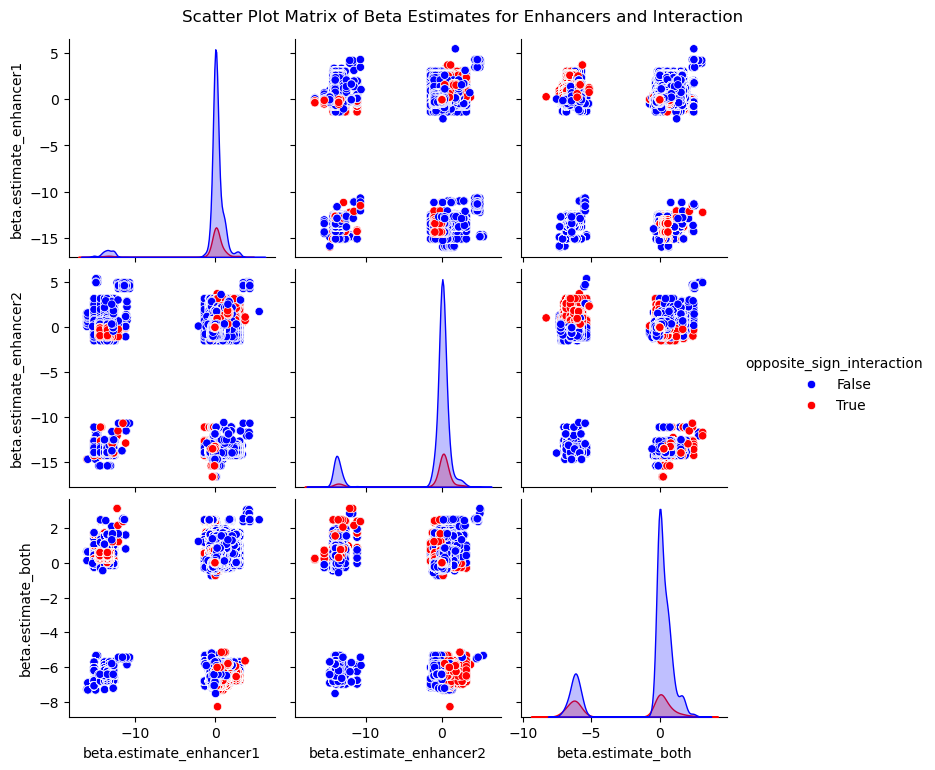

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot pair plot of beta estimates
sns.pairplot(betas, vars=['beta.estimate_enhancer1', 'beta.estimate_enhancer2', 'beta.estimate_both'], 
             hue='opposite_sign_interaction', palette={True: 'red', False: 'blue'})
plt.suptitle("Scatter Plot Matrix of Beta Estimates for Enhancers and Interaction", y=1.02)
plt.show()

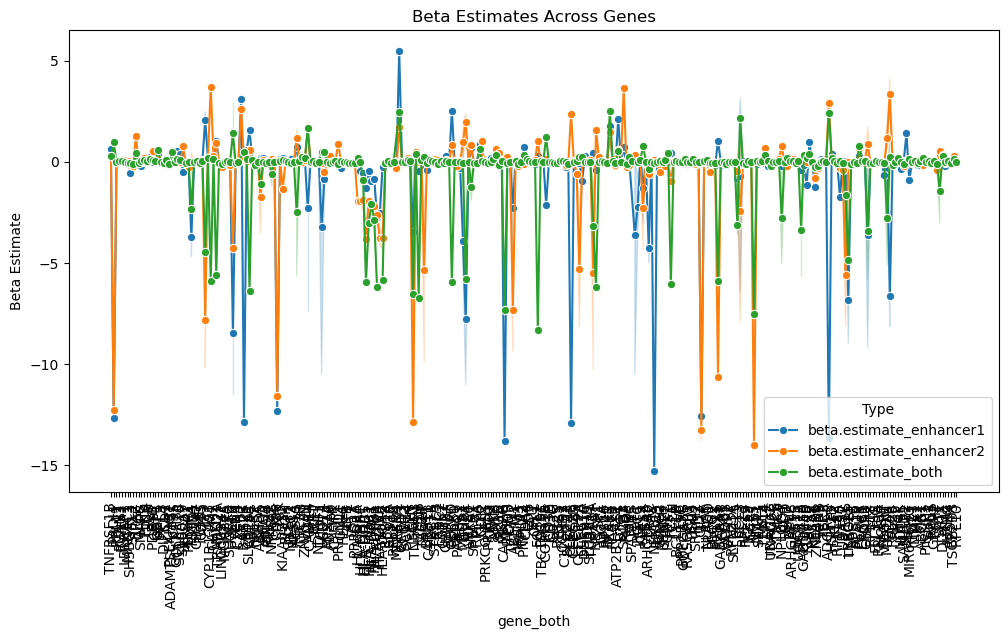

In [14]:
# Melt data for line plot
line_plot_df = betas.melt(id_vars='gene_both', value_vars=['beta.estimate_enhancer1', 'beta.estimate_enhancer2', 'beta.estimate_both'], 
                       var_name='Type', value_name='Beta Estimate')

# Line plot for each gene
plt.figure(figsize=(12, 6))
sns.lineplot(x='gene_both', y='Beta Estimate', hue='Type', data=line_plot_df, marker='o')
plt.xticks(rotation=90)
plt.title("Beta Estimates Across Genes")
plt.show()